----
# Laboratorium 10 - Filtry analogowe, część 1

----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskie

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib`, `imageio` oraz `scipy.signal`.
### 0.2. Przypomnienie wiadomości o filtrach analogowych
### 0.3. Moduł transmitancji i tłumienie
### 0.4.  Gabaryty filtru
### 0.5.  Aproksymacje Butterwortha, Czebyszewa (1 i 2 rodzaju) i Cauera (eliptyczna)


In [1]:
%matplotlib inline
import sympy 
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt 



----

### Zadanie 1

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Butterwortha   
    - rząd filtru n (dla n od 1 do 5)  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedz:  
    - wykorzystaj funkcję `scipy.signal.butter`, pamiętaj aby zaprojektować filtr analogowy  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

1. - 5.616532191513887dB/oktawe
2. - 11.430213921639677dB/oktawe
3. - 17.1957145324941dB/oktawe
4. - 22.950257662388466dB/oktawe
5. - 28.700707856692205dB/oktawe


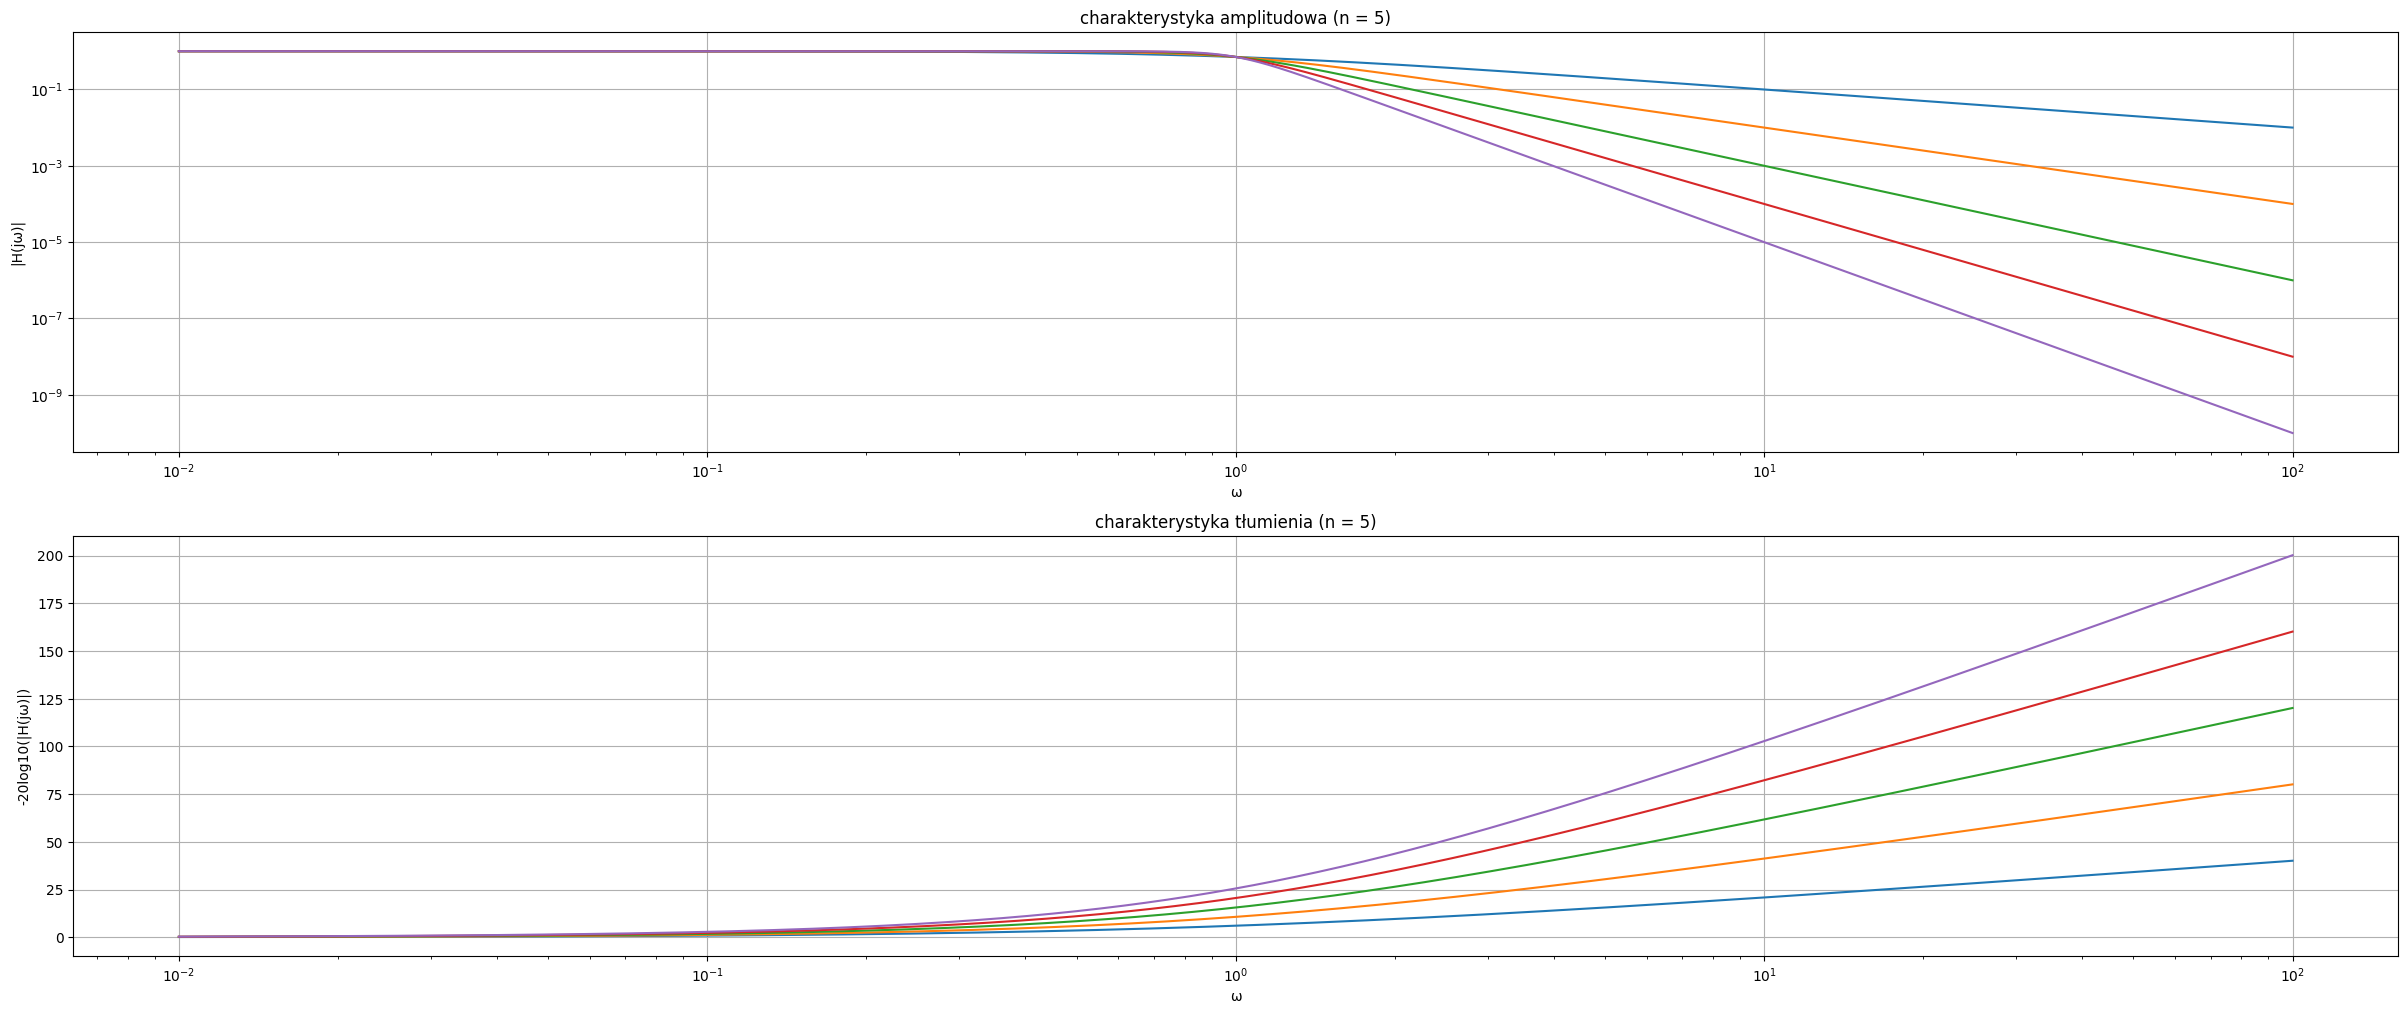

In [2]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)

for i in range(1,n+1):    
    #design filter
    licznik, mianownik = scipy.signal.butter(i, wp, btype="Low", analog=True, output="ba")
    
    #calculate transmitance samples and magnitude characteristic
    pulsacje, odpowiedz_czestotliwosciowa = scipy.signal.freqs(licznik, mianownik, worN=w)

    #calculate Attenuation
    tlumienie = -20*np.log10(np.polyval(licznik, w)/np.polyval(mianownik, w))

    #calculate attenuation per octave
    naOktawe = -20*np.log10(np.polyval(licznik, 20)/np.polyval(mianownik, 20)) - -20*np.log10(np.polyval(licznik, 10)/np.polyval(mianownik, 10))
    print(str(i) +". - "+ str(naOktawe)+"dB/oktawe")

    #display magnitude characteristic
    axs[0].loglog(w, abs(odpowiedz_czestotliwosciowa))
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[1].semilogx(w, tlumienie)
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()

### Zadanie 2

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Czebyszewa I rodzaju   
    - rząd filtru n (dla n od 1 do 5)  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedź:  
    - wykorzystaj funkcję `scipy.signal.cheby1`, pamiętaj aby zaprojektować filtr analogowy, maksymalne tętnienie (rp, ripple) oznacza  maksymalne tłumienie w paśmie przepustowym  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

1. - 5.27629516059546dB/oktawe
2. - 11.537430649253025dB/oktawe
3. - 17.58703011267491dB/oktawe
4. - 23.606431081829555dB/oktawe
5. - 29.61761084221628dB/oktawe


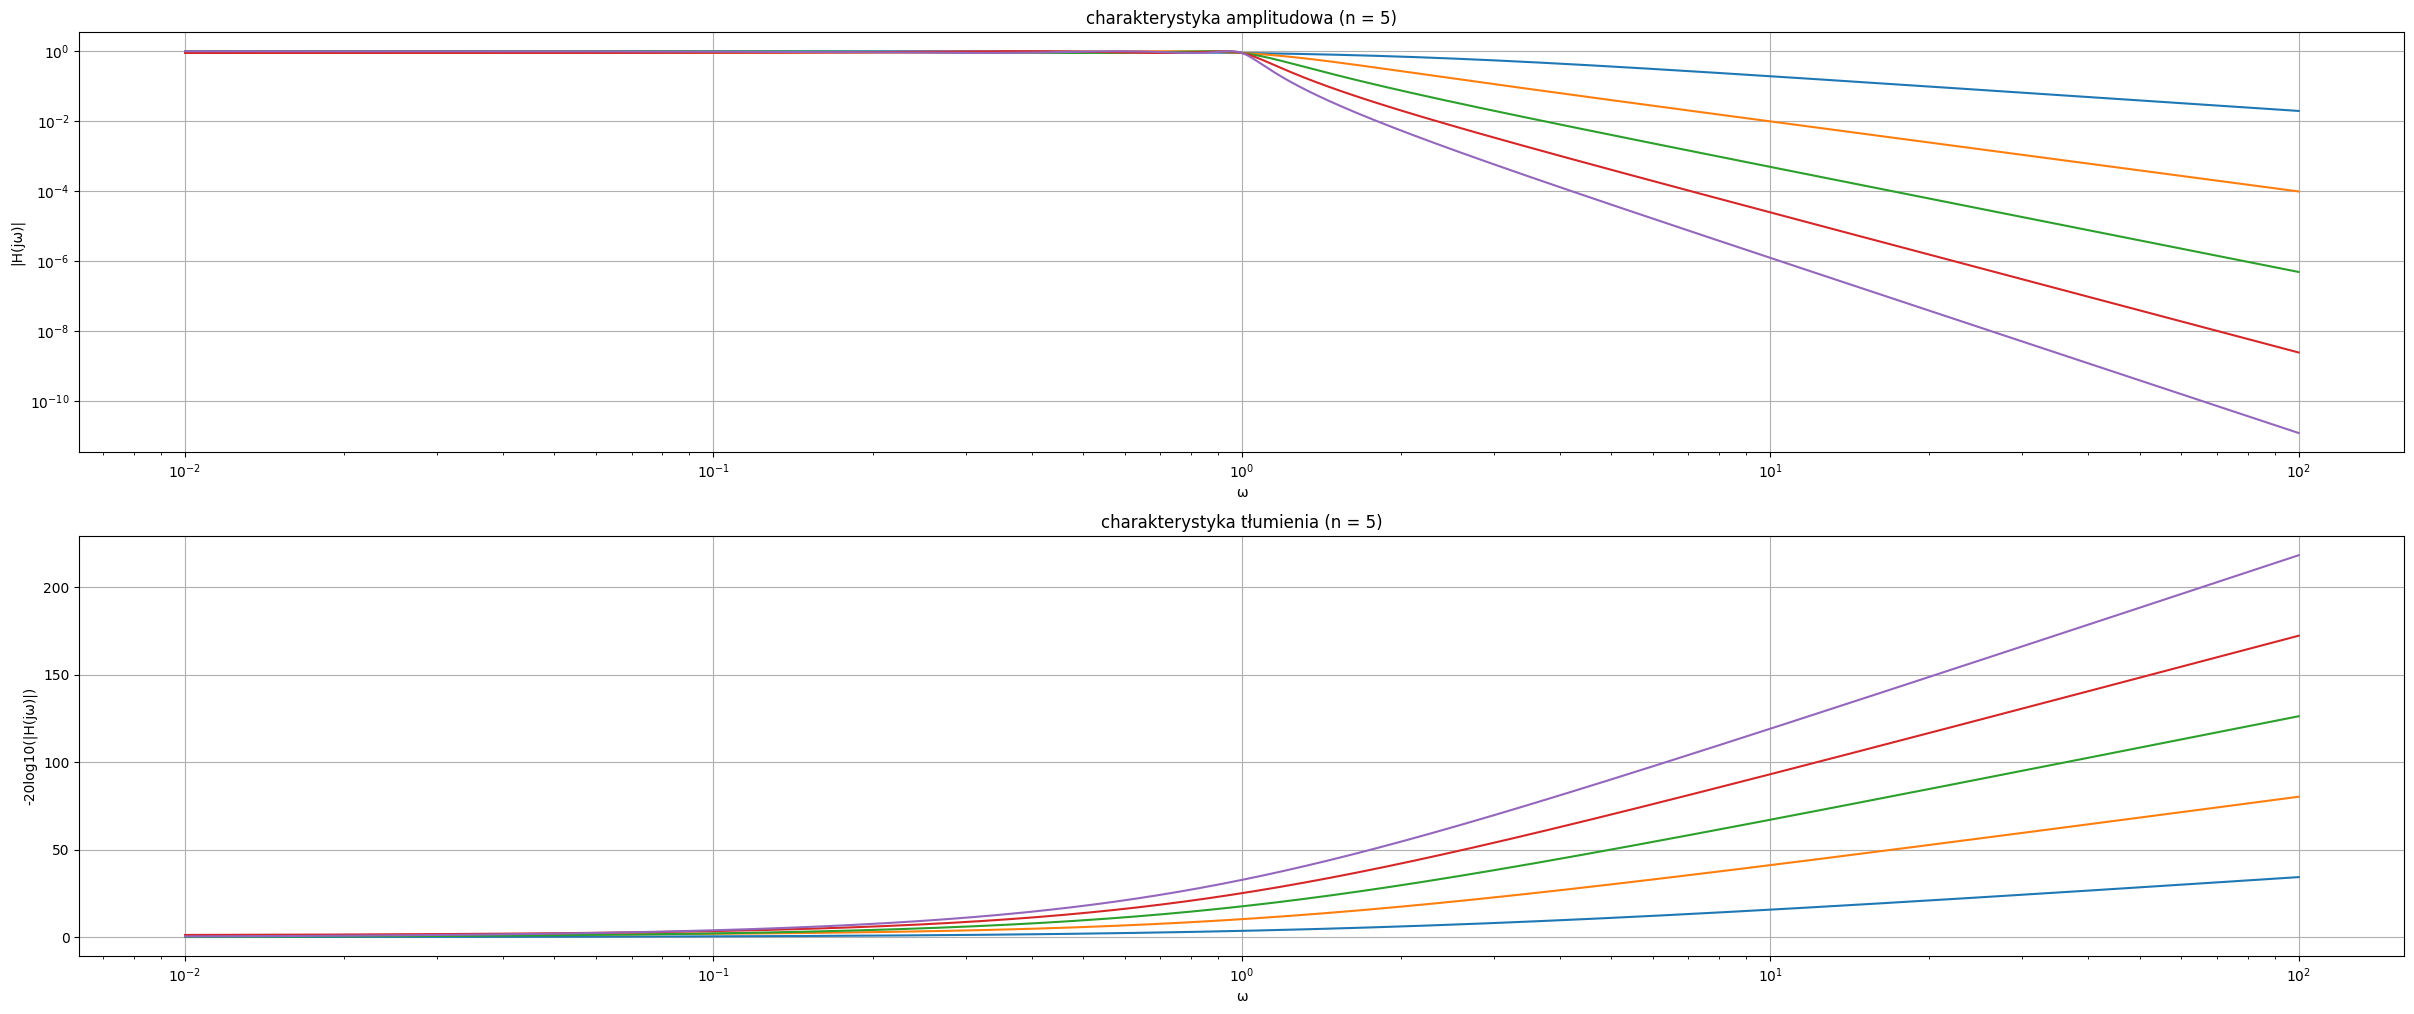

In [3]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)

for i in range(1,n+1):    
    #design filter
    licznik, mianownik = scipy.signal.cheby1(i, 1, wp, btype="Low", analog=True, output="ba")
    
    #calculate transmitance samples and magnitude characteristic
    pulsacje, odpowiedz_czestotliwosciowa = scipy.signal.freqs(licznik, mianownik, worN=w)

    #calculate Attenuation
    tlumienie = -20*np.log10(np.polyval(licznik, w)/np.polyval(mianownik, w))

    #calculate attenuation per octave
    naOktawe = -20*np.log10(np.polyval(licznik, 20)/np.polyval(mianownik, 20)) - -20*np.log10(np.polyval(licznik, 10)/np.polyval(mianownik, 10))
    print(str(i) +". - "+ str(naOktawe)+"dB/oktawe")

    #display magnitude characteristic
    axs[0].loglog(w, abs(odpowiedz_czestotliwosciowa))
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[1].semilogx(w, tlumienie)
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()

### Zadanie 3  
Porównać charakterystyki amplitudowe i fazowe dla aproksymacji Butterwortha i Czebyszewa I rodzaju:
    - rząd filtru n = 5  
    - pulsacja graniczna ω=1 rad/s  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie)  
    - wykreślić charakterystyki fazowe (na jednym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

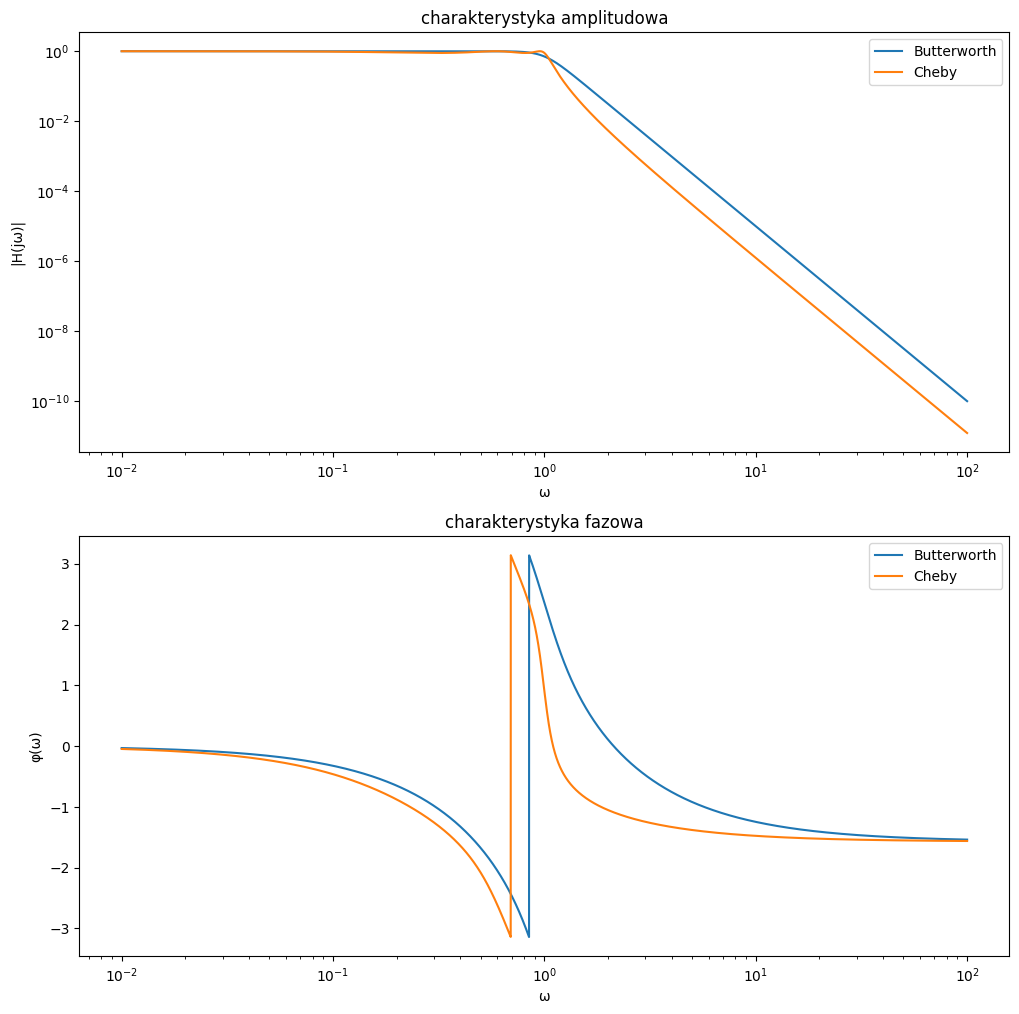

In [4]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[12,12])    
#log w vector
w = np.logspace(-2,2,10000)

#Butterworth
#design filter
licznik, mianownik = scipy.signal.butter(n, wp, btype="Low", analog=True, output="ba")

#calculate transmitance samples and magnitude characteristic
probki_transmitancji = np.polyval(licznik, 1j*w)/np.polyval(mianownik, 1j*w)
charakterystyka_amplitudowa = abs(probki_transmitancji)

#calculate phase 
charakterystyka_fazowa = np.angle(probki_transmitancji)

#display magnitude characteristic
axs[0].loglog(w, charakterystyka_amplitudowa, label="Butterworth")
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w, charakterystyka_fazowa, label="Butterworth")
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#cheby
#design filter
licznik, mianownik = scipy.signal.cheby1(n, 1, wp, btype="Low", analog=True, output="ba")

#calculate transmitance samples and magnitude characteristic
probki_transmitancji = np.polyval(licznik, 1j*w)/np.polyval(mianownik, 1j*w)
charakterystyka_amplitudowa = abs(probki_transmitancji)

#calculate phase 
charakterystyka_fazowa = np.angle(probki_transmitancji)

#display magnitude characteristic
axs[0].loglog(w, charakterystyka_amplitudowa, label="Cheby") 
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[0].legend()
axs[1].semilogx(w, charakterystyka_fazowa, label="Cheby")
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()
axs[1].legend()

### Zadanie 4

Wyznaczanie minimalnego wymaganego rzędu filtru:  
 ### gabaryty: 
 - a)   αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s  
 - b)   αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
### filtry:  
 - Butterwortha
 - Czebyszewa I rodzaju
 - Czebyszewa II rodzaju
 - Cauer (eliptyczny)

### Podpowiedź : 
 - użyj funkcji: `scipy.signal.buttord`, `scipy.signal.cheb1ord`, `scipy.signal.cheb2ord`, `scipy.signal.ellipord`

In [5]:
# I - case
# αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s 
print("a)")
N, Wn = scipy.signal.buttord(3, 8, 3, 80, analog=True)
print("Butterwortha: " + str(N))
N, Wn = scipy.signal.cheb1ord(3, 8, 3, 80, analog=True)
print("Czebyszewa I rodzaju: " + str(N))
N, Wn = scipy.signal.cheb2ord(3, 8, 3, 80, analog=True)
print("Czebyszewa II rodzaju: " + str(N))
N, Wn = scipy.signal.ellipord(3, 8, 3, 80, analog=True)
print("Cauer (eliptyczny): " + str(N))

# II-nd case
# αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
print("b)")
N, Wn = scipy.signal.buttord(2, 3, 0.5, 100, analog=True)
print("Butterwortha: " + str(N))
N, Wn = scipy.signal.cheb1ord(2, 3, 0.5, 100, analog=True)
print("Czebyszewa I rodzaju: " + str(N))
N, Wn = scipy.signal.cheb2ord(2, 3, 0.5, 100, analog=True)
print("Czebyszewa II rodzaju: " + str(N))
N, Wn = scipy.signal.ellipord(2, 3, 0.5, 100, analog=True)
print("Cauer (eliptyczny): " + str(N))


a)
Butterwortha: 10
Czebyszewa I rodzaju: 7
Czebyszewa II rodzaju: 7
Cauer (eliptyczny): 5
b)
Butterwortha: 31
Czebyszewa I rodzaju: 14
Czebyszewa II rodzaju: 14
Cauer (eliptyczny): 9


### Zadanie 5   

Korzystając z napisanej w zadaniu 5 funkcji powtórz zadania 1-4 dla filtru górnoprzepustowego.

### Podpowiedź 
- zmień parametr `btype` poszczególnych funkcji na "high"
- pamiętaj, aby zmienić pulsację przy wyznaczniu tłumienia na oktawę tak, aby obliczać je w obszarze zaporowym
 

### Zadanie 6 

Napisz funkcję:
 - wyliczającą rząd filtru dla danej aproksymacji 
 - projektującą filtr (transmitancja) 
 - wykreślanie charakterystyk amplitudowych filtrów wraz z liniami odpowiadającymi gabarytom filtrów 

#### Paniętaj, że dla filtru Czebyszewa II typu, funkcja projektująca transmitancję filtru przyjmuje wartość `ws` jako argument o nazwie `wn` (patrz dokumentacja)

Wyświetl filtry a) i b) z zadania 4 dla wszystkich aproksymacji (na jednym wykresie charakterystyki dla danych gabarytów)

In [6]:
def designFilter(charType =  'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80) : 
    #find order and design filter
    
    #display characteristics
    
    return
designFilter(charType =  'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80)
